# Imports  & Data

In [2]:
import pandas as pd
# import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
import analysis_util
import tqdm
from scipy.stats import pearsonr, spearmanr
import numpy as np
import plotly.express as px
import datetime

import nltk 
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

In [3]:
subreddits = ['FourSentenceStories','Trump666','GraphTheory','jazznoir','indoorbouldering','kiwi_bird','DTU']
period = '2015-01-01-2022-01-01'

df_post_dict = {}
df_comment_dict = {}
df_all_nodes_dict = {}
G_dict = {}
G_di_dict = {}
df_authors_dict = {}
df_comment_post_dict = {}


for subreddit in subreddits:
    path_post='../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_posts.csv"
    path_comment = '../data/raw/'+ subreddit +'_'+  period +'/'+ subreddit + "_comments.csv"
    
    df_comments=analysis_util.read_comments(path_comment)
    df_post=analysis_util.read_posts(path_post)
    df_all_nodes=analysis_util.get_all_nodes(df_post,df_comments)
    
    G_di = analysis_util.get_DiGraph(df_post,df_comments,df_all_nodes)
    G=analysis_util.get_graph(df_post,df_comments,df_all_nodes)
    G_big=analysis_util.get_biggest_component(G)
    
    df_comment_post = analysis_util.get_comment_post_date(df_comments,df_post)
    df_authors = analysis_util.get_authors(G,df_all_nodes,df_comments,df_post,df_comment_post)

    print(subreddit)
    df_comment_post_dict[subreddit] = df_comment_post
    df_comment_dict[subreddit] = df_comments
    df_post_dict[subreddit] = df_post
    df_all_nodes_dict[subreddit] = df_all_nodes
    G_dict[subreddit] = G_big
    df_authors_dict[subreddit] = df_authors
    G_di_dict[subreddit] = G_di

Removed 0.008264462809917328 of the rows
FourSentenceStories
Removed 0.023008849557522026 of the rows
Trump666
Removed 0.046391752577319645 of the rows
GraphTheory
Removed 0.056192660550458795 of the rows
jazznoir
Removed 0.013580246913580174 of the rows
indoorbouldering
Removed 0.01412429378531077 of the rows
kiwi_bird
Removed 0.02263374485596703 of the rows
DTU


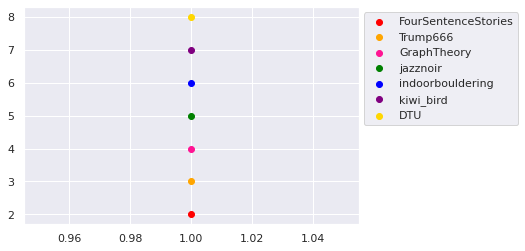

In [4]:
# a color for each subreddit in a dictionary
color_dict = {'FourSentenceStories':'#FF0000','Trump666':'#FFA500','GraphTheory':'#FF1493','jazznoir':'#008000','indoorbouldering':'#0000FF','kiwi_bird':'#800080','DTU':'#FFD700'}

# plot each color
i = 1
for subreddit in subreddits:
    i = 1 + i
    plt.scatter([1], [i], c=color_dict[subreddit], label=subreddit)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

# # change grahtheory color to dark baby red
color_dict['GraphTheory'] = '#FF1493'

# Double edge swapped algo  

In [89]:
def cluster_coefficient_swapped_pvalue(G):
    average_clustering = []
    for i in range(1000):
        G_swapped = G.copy()
        G_swapped = nx.double_edge_swap(G_swapped, nswap=len(G)*0.1, max_tries=len(G)*4)
        average_clustering.append(nx.average_clustering(G_swapped))
    
    p_value = np.array(np.array(average_clustering) > nx.average_clustering(G)).sum() / len(average_clustering)
    
    print('Clustering coefficient p-value: ', p_value)
    return p_value, average_clustering, nx.average_clustering(G)

FourSentenceStories
Clustering coefficient p-value:  0.081
p-value:  0.081


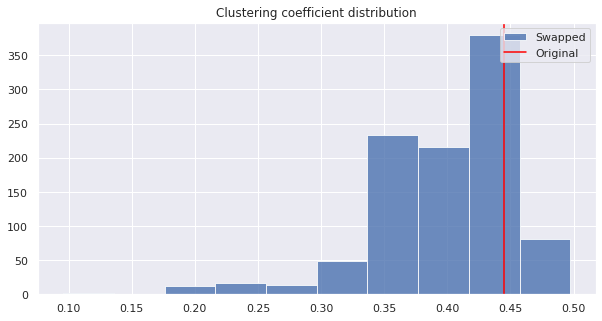

Trump666
Clustering coefficient p-value:  0.0
p-value:  0.0


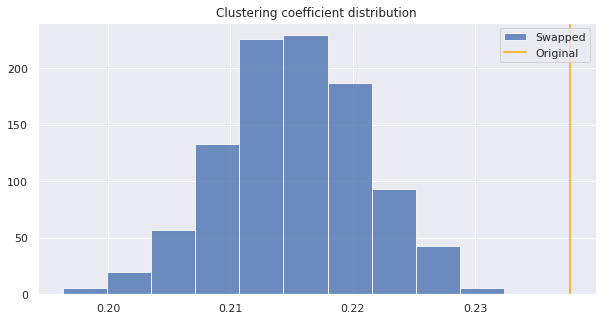

GraphTheory
Clustering coefficient p-value:  0.38
p-value:  0.38


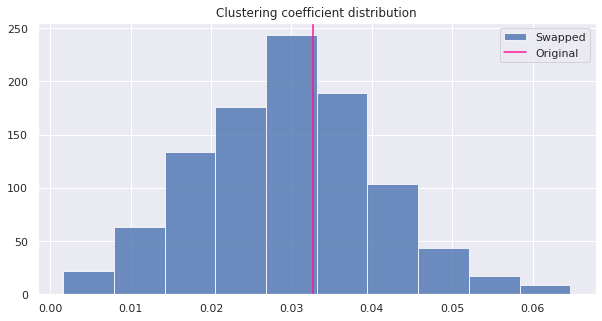

jazznoir
Clustering coefficient p-value:  0.144
p-value:  0.144


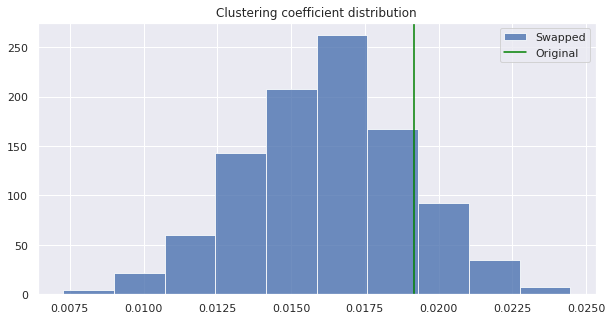

indoorbouldering
Clustering coefficient p-value:  0.0
p-value:  0.0


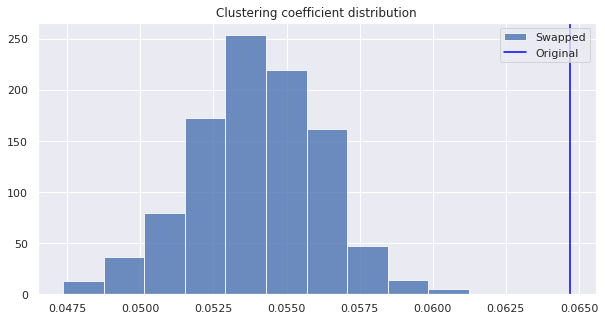

kiwi_bird
Clustering coefficient p-value:  0.161
p-value:  0.161


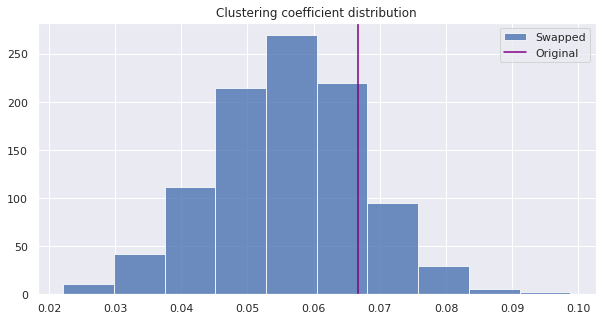

DTU
Clustering coefficient p-value:  0.001
p-value:  0.001


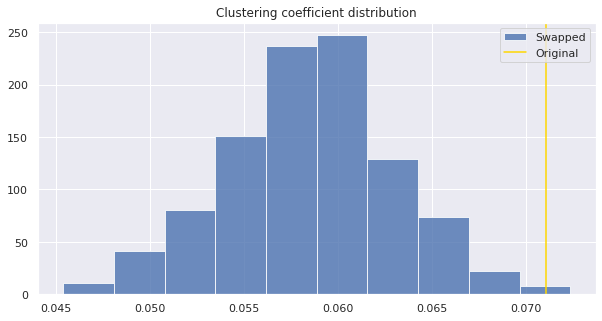

In [117]:
for sub in subreddits:
    print(sub)
    p,arr,avg = cluster_coefficient_swapped_pvalue(G_dict[sub])
    print('p-value: ', p)
    plt.figure(figsize=(10,5))
    plt.hist(arr, alpha=0.8, label='Swapped')
    plt.axvline(avg, color=color_dict[sub], label='Original')
    plt.legend(loc='upper right')
    plt.title('Clustering coefficient distribution')
    plt.show()
